# Gini Index

### Importing Dependencies

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

### Importing Dataset

In [25]:
df = pd.read_csv(r'classification.csv')

In [26]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Data Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [28]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Data Visualisation

<AxesSubplot:ylabel='Density'>

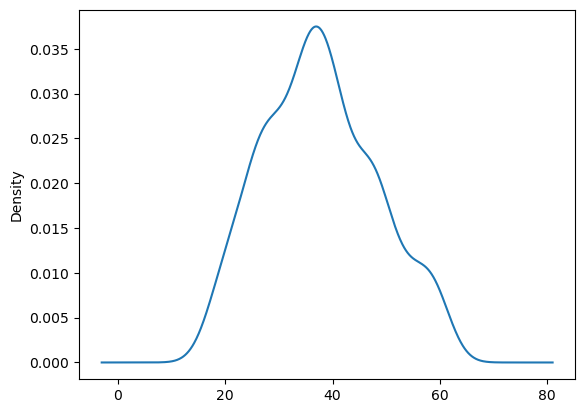

In [29]:
df.Age.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

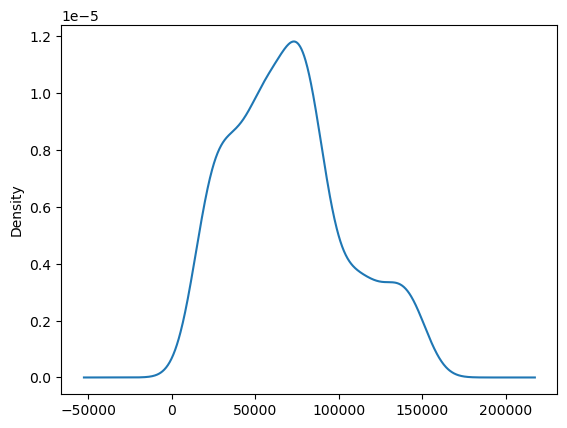

In [30]:
df.EstimatedSalary.plot(kind='kde')

## Gini Index

In [31]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [32]:
print(f"Gini Index of Age column is {gini(df['Age'])}")
print(f"Gini Index of Age column is {gini(df['EstimatedSalary'])}")

Gini Index of Age column is 0.15851314566458638
Gini Index of Age column is 0.2754592787754956


# Decision Tree Classifier

### Importing Dataset

In [33]:
df1 = pd.read_csv(r"diabetes.csv")

In [34]:
df1.drop("Age",inplace=True,axis=1)

In [35]:
df1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


### Data Analysis

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage

In [37]:
df1.isna().sum()

Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Data Visualisation

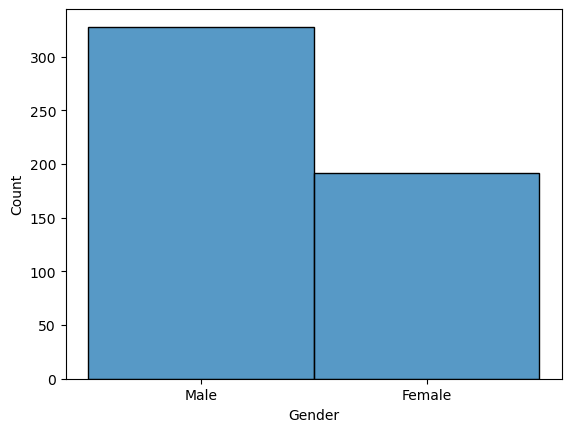

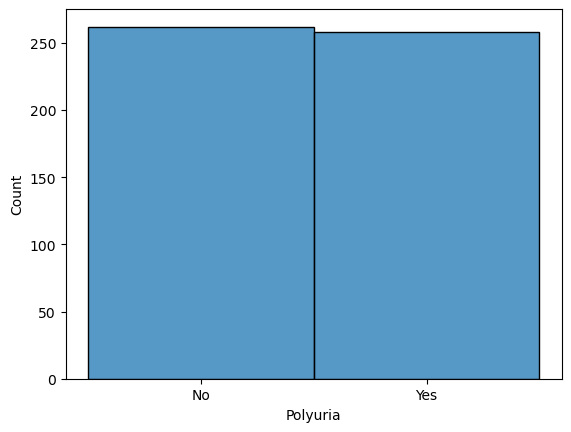

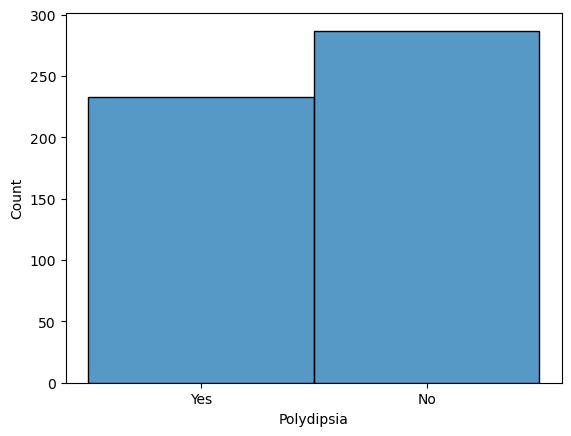

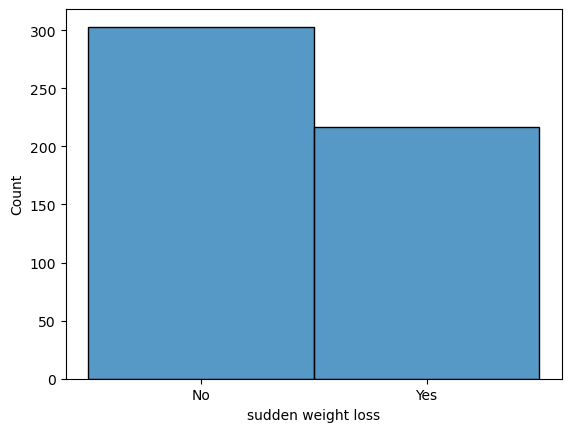

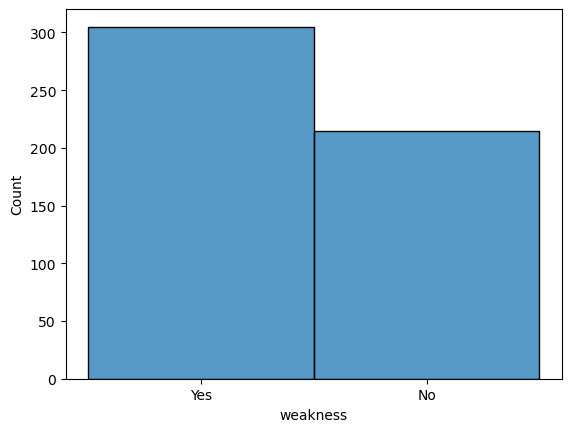

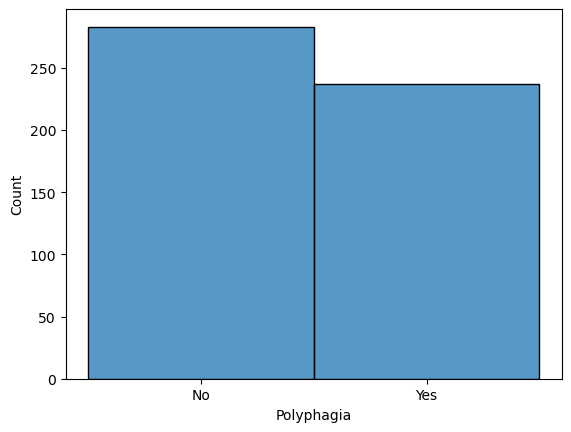

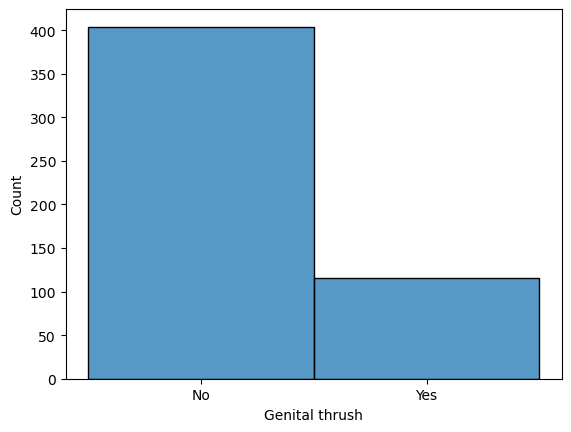

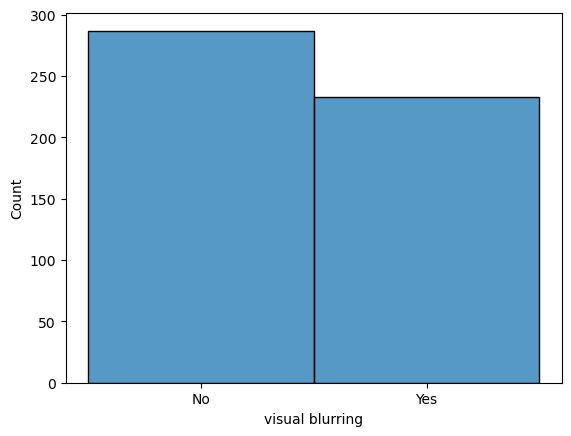

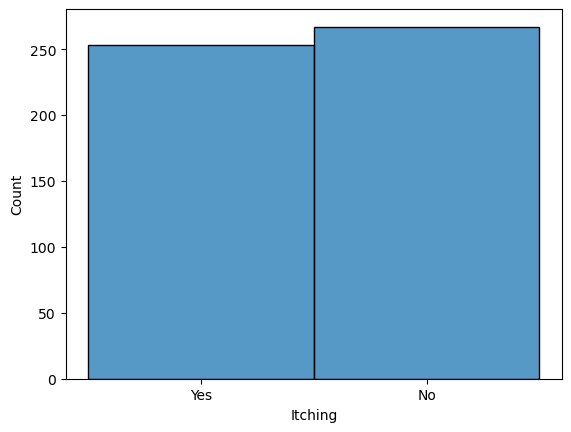

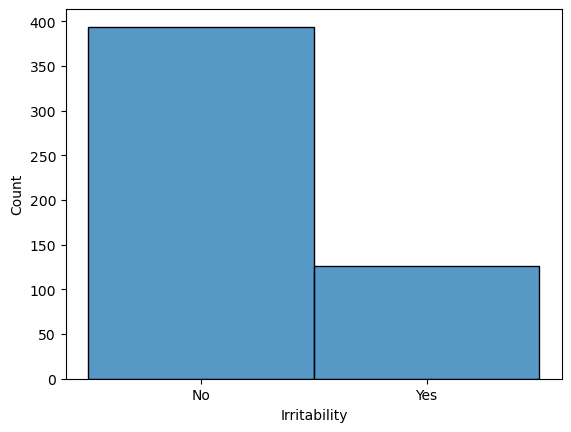

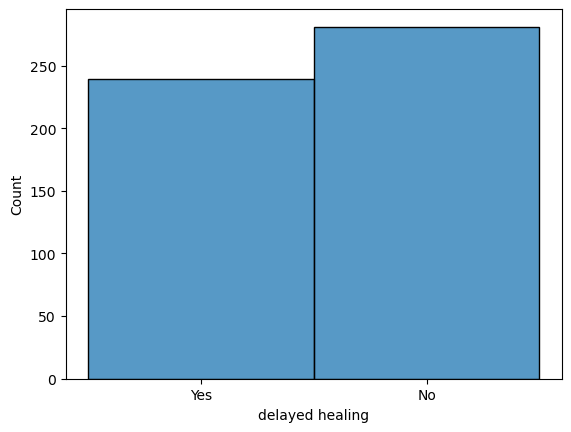

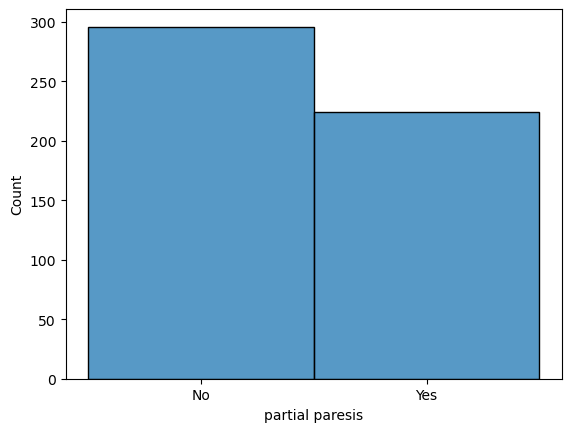

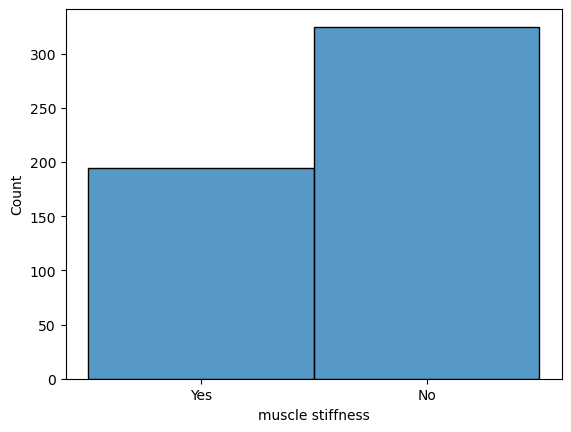

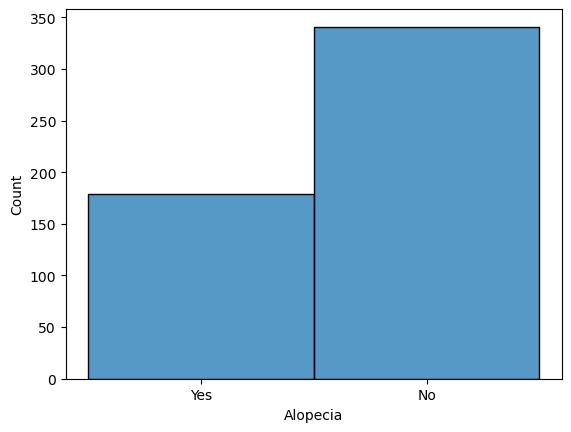

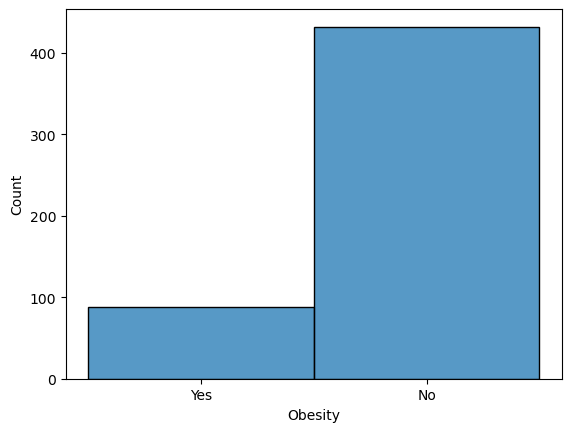

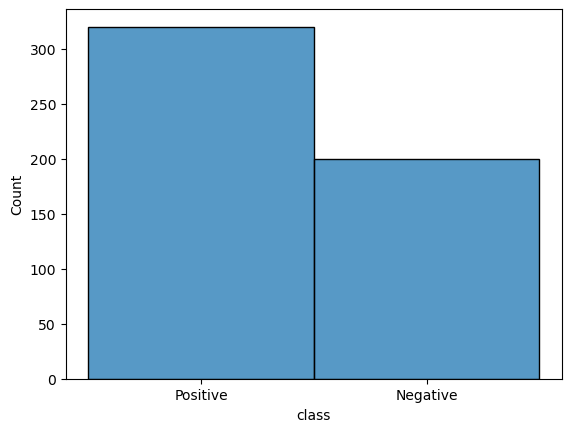

In [38]:
for i in df1:
    sns.histplot(df1[i])
    plt.show()

### Encoding

In [39]:
gender_label = {'Male': 0, 'Female':1}
label_rest = {'No':0,'Yes': 1}
class_label = {'Positive': 1, 'Negative': 0}

In [40]:
for i in df1:
    if i == 'Gender':
        df1[i] = df1[i].map(gender_label)
    elif i == "class":
        df1[i] = df1[i].map(class_label)
    else:
        df1[i] = df1[i].map(label_rest)

In [41]:
x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

### Model

In [43]:
class Node:
    def __init__(self, feature = None, threshold  = None, df_left = None, df_right = None, gain = None, value = None):
        self.feature = feature
        self.threshold = threshold
        self.df_left = df_left
        self.df_right = df_right
        self.gain = gain
        self.value = value

In [44]:
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        
    @staticmethod
    def _entropy(s):
        counts = np.bincount(np.array(s, dtype=np.int64))
        percentages = counts / len(s)

        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    def _information_gain(self, parent, left_child, right_child):
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))
    
    def _best_split(self, X, y):

        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            for threshold in np.unique(X_curr):
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                if len(df_left) > 0 and len(df_right) > 0:
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        return best_split
    
    def _build(self, X, y, depth=0):
        n_rows, n_cols = X.shape
        
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            best = self._best_split(X, y)
            if best['gain'] > 0:
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    df_left=left, 
                    df_right=right, 
                    gain=best['gain']
                )
        return Node(
            value=Counter(y).most_common(1)[0][0]
        )
    
    def fit(self, X, y):
        self.root = self._build(X, y)
        
    def _predict(self, x, tree):
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.df_left)
        
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.df_right)
        
    def predict(self, X):
        return [self._predict(x, self.root) for x in X]

In [45]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
model = DecisionTree()
model.fit(x_train, y_train)
pred = model.predict(x_test)

### Checking Metrics

In [47]:
print(accuracy_score(pred,y_test))

0.9461538461538461


In [48]:
print(confusion_matrix(pred,y_test))

[[51  2]
 [ 5 72]]


In [49]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        53
         1.0       0.97      0.94      0.95        77

    accuracy                           0.95       130
   macro avg       0.94      0.95      0.94       130
weighted avg       0.95      0.95      0.95       130



## Decision Tree Using SK-Learn Libraries

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### Checking Metrics

In [51]:
print(accuracy_score(y_pred,y_test))

0.9692307692307692


In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.97      0.97      0.97        74

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [53]:
print(confusion_matrix(y_test, y_pred))

[[54  2]
 [ 2 72]]
